# 15_1.Chi-square test(동질성)
- https://www.statsmodels.org/devel/contingency_tables.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
prech_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/15_1.PreCH.csv', encoding="cp949")
prech_df.head()

,실험처치,감기발병
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
prech_df['실험처치'].replace({1:'실험군', 2:'대조군'}, inplace=True)
prech_df['감기발병'].replace({1:'정상', 2:'감기'}, inplace=True)
prech_df['실험처치'] = prech_df['실험처치'].astype('category')
prech_df['감기발병'] = prech_df['감기발병'].astype('category')
prech_df

,실험처치,감기발병
0,실험군,정상
1,실험군,정상
2,실험군,정상
3,실험군,정상
4,실험군,정상
...,...,...
95,대조군,정상
96,대조군,감기
97,대조군,정상
98,대조군,정상


### 2.3 자료구조 살펴보기

In [5]:
prech_df.shape

(100, 2)

In [6]:
prech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   실험처치    100 non-null    category
 1   감기발병    100 non-null    category
dtypes: category(2)
memory usage: 576.0 bytes


In [7]:
prech_df.columns

Index(['실험처치', '감기발병'], dtype='object')

## 3.Chi-square test(동질성)

### 3.1 분할표(contingency table)

In [8]:
tab = pd.crosstab(prech_df['실험처치'], prech_df['감기발병'])
tab

감기발병,감기,정상
실험처치,,
대조군,38,12
실험군,17,33


In [9]:
# 위치 조정
tab = tab.loc[["실험군", "대조군"], :]
tab = tab.loc[:, ["정상", "감기"]]

In [10]:
tab

감기발병,정상,감기
실험처치,,
실험군,33,17
대조군,12,38


### 3.2 교차분석

In [11]:
# ch분석
result = sm.stats.Table(tab)

In [12]:
# observed
print(result.table_orig)

감기발병  정상  감기
실험처치        
실험군   33  17
대조군   12  38


In [13]:
# expected
print(result.fittedvalues)

감기발병    정상    감기
실험처치            
실험군   22.5  27.5
대조군   22.5  27.5


In [14]:
# Pearson
rslt = result.test_nominal_association()
print(rslt.pvalue)

2.4304960694832012e-05


### 3.3 표준화잔차

In [15]:
# 표준화 잔차
result.standardized_resids

감기발병,정상,감기
실험처치,,
실험군,4.221159,-4.221159
대조군,-4.221159,4.221159


### 3.4 상대적 위험률

In [16]:
table = np.asarray(tab)
table

array([[33, 17],
       [12, 38]])

In [17]:
table

array([[33, 17],
       [12, 38]])

In [18]:
t22 = sm.stats.Table2x2(table)

In [19]:
print(t22.summary())

               Estimate   SE   LCB   UCB   p-value
--------------------------------------------------
Odds ratio        6.147       2.565 14.729   0.000
Log odds ratio    1.816 0.446 0.942  2.690   0.000
Risk ratio        2.750       1.616  4.681   0.000
Log risk ratio    1.012 0.271 0.480  1.543   0.000
--------------------------------------------------


## 4.그래프

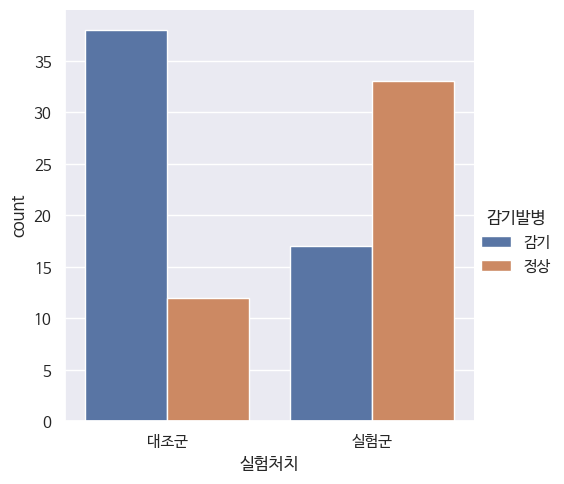

In [20]:
# 누적 막대그래프(count)
sns.catplot(x = "실험처치",
            hue = "감기발병",
            kind = "count",
            data = prech_df)
plt.show()

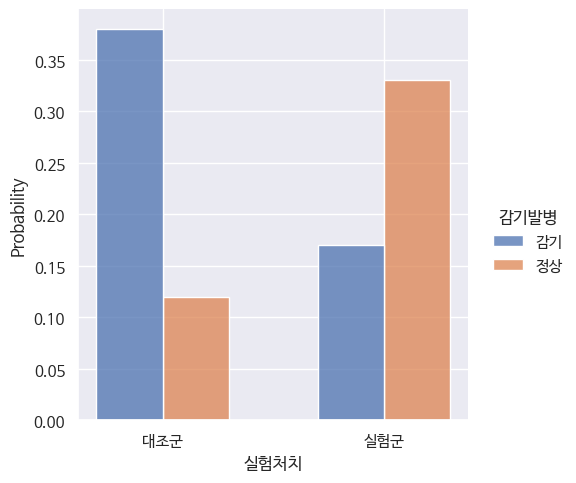

In [21]:
# 누적 막대그래프(hist) + 비율
sns.displot(x = "실험처치",
            shrink = .6,
            stat = "probability",
            hue = "감기발병",
            multiple = "dodge",
            kind = "hist",
            data = prech_df)
plt.show()